# Trajectory Optimization for a hop

# Run slip_test.py

In [21]:
import importlib
from archive import slip_test
importlib.reload(slip_test)

from slip_test import * 

planner = OfflinePlanner()

print("k: ", planner.aslip.k)
jump_distance = np.array([2.0, 0])

t_last = 1.0

# print(final_config)
x_traj, z_traj, t_land, v_x_traj, v_z_traj = planner.find_com_trajectory(planner.aslip.x_0 * 2, t_last, jump_distance)
t = np.linspace(0, t_last, 100)
xx = x_traj(t)[-1]
zz = z_traj(t)[-1]

v_xx = v_x_traj(t)[-1]
v_zz = v_z_traj(t)[-1]
print(v_zz)
print(t_land)

dt = t[1] - t[0]

tt = t_last

x_com = []
z_com = []
x_com.append(xx)
z_com.append(zz)

t_max = t_last + t_land[0]


while tt < t_max:
    xx += v_xx * dt
    zz += v_zz * dt + (1 / 2) * planner.aslip.g * dt**2
    v_zz += planner.aslip.g * dt
    x_com.append(xx)
    z_com.append(zz)
    tt += dt

t = np.linspace(0, t_last, 100)
# plt.figure()
p1, = plt.plot(x_traj(t), z_traj(t), label='Optimal Trajectory')
p2, = plt.plot(x_com, z_com, label='Landing Kinematics')

plt.xlabel("x [m]")
plt.ylabel("z [m]")
plt.legend(handles=[p1, p2])
plt.show()

# plt.figure()
plt.plot(t, 180 / np.pi * np.arctan2(z_traj(t), x_traj(t)))
plt.xlabel("time")
plt.ylabel("angle [degrees]")
plt.show()


ModuleNotFoundError: No module named 'slip_test'

# Run offline_planner.py

d_0:  0.806225774829855
d_f:  sqrt((pow(( - x_19(0) + x_19(4)), 2) + pow(( - x_19(1) + x_19(5)), 2) + pow(( - x_19(2) + x_19(6)), 2)))
<class 'pydrake.trajectories.PiecewisePolynomial_[float]'>
3.9135949261628284
[0.84250795]


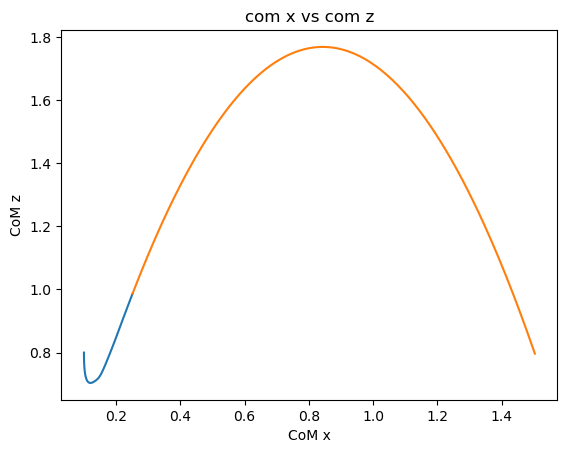

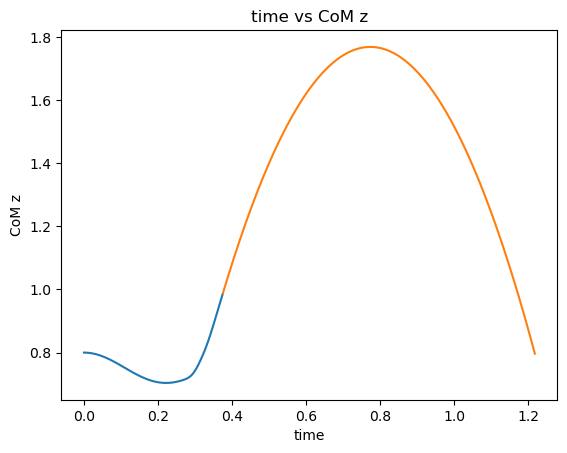

In [125]:
import numpy as np
import matplotlib.pyplot as plt

import importlib
import offline_planner
importlib.reload(offline_planner)
from offline_planner import OfflinePlanner


planner = OfflinePlanner()

print("d_0: ", planner.d_0)

t_last = 0.375
distance = np.array([1.50, 0])

x_traj, z_traj, t_land, v_x_traj,  v_z_traj, f_x_traj, f_z_traj, f_vx_traj, f_vz_traj = planner.find_com_trajectory(planner.aslip.x_0 * 2, t_last, distance)


# print(planner.find_com_trajectory(planner.aslip.x_0 * 2, t_last, distance))

t = np.linspace(0, t_last, 100)
xx = x_traj(t)[-1]
zz = z_traj(t)[-1]

v_xx = v_x_traj(t)[-1]
v_zz = v_z_traj(t)[-1]
print(v_zz)
print(t_land)

dt = t[1] - t[0]

tt = t_last

x_com = []
z_com = []
x_com.append(xx)
z_com.append(zz)
# print(t_land)
# print(dt)

t_max = t_last + t_land[0]
# t_max = 20

while tt < t_max:
    xx += v_xx * dt
    zz += v_zz * dt + (1 / 2) * planner.aslip.g * dt**2
    v_zz += planner.aslip.g * dt
    x_com.append(xx)
    z_com.append(zz)
    tt += dt

# print(len(x_com))

t = np.linspace(0, t_last, 100)

plt.figure()
plt.title("com x vs com z")
plt.plot(x_traj(t), z_traj(t))
plt.plot(x_com, z_com)
plt.xlabel("CoM x")
plt.ylabel("CoM z")
plt.show()

t2 = np.linspace(t_last, t_max, (t_max - t_last)/dt + 2)

plt.figure()
plt.title("time vs CoM z")
plt.plot(t, z_traj(t))
plt.plot(t2, z_com)
plt.xlabel("time")
plt.ylabel("CoM z")
plt.show()

# plot foot z versus time (pre and post jump)
# plt.figure()
# plt.plot(t, f_z_traj(t))
# plt.plot(t2, f_z_traj(t2))
# plt.title("Foot z vs t (pre and post jump)")
# plt.xlabel("time")
# plt.ylabel("Foot z")
# plt.show()


# foot x vs foot z without post jump
# plt.figure()
# plt.plot(f_x_traj(t), f_z_traj(t))
# plt.xlabel("Foot x")
# plt.ylabel("Foot z")
# plt.show()




# plt.figure()
# plt.title("angle vs time")
# plt.plot(t, 180 / np.pi * np.arctan2(z_traj(t), x_traj(t)))
# plt.show()

# plt.figure()
# plt.plot(t, z_traj(t))
# plt.show()


Visualize

## Start meshcat visualizer

Open the visualizer by clicking on the url in the output of this cell.

In [7]:
from pydrake.all import FindResourceOrThrow, StartMeshcat, MeshcatVisualizer
meshcat = StartMeshcat()


Installing NginX server for MeshCat on Deepnote...
INFO:drake:Meshcat listening for connections at https://d9d30b34-d2b0-45d2-80c6-e254c58714f3.deepnoteproject.com/7000/


Run the code/begin simulation

floating base:
torso
joints:
left_upper_leg_mass_weld
left_lower_leg_mass_weld
right_upper_leg_mass_weld
torso_mass_weld
right_lower_leg_mass_weld
left_hip_x
left_hip_y
left_hip_z
left_hip_z_upperleg
right_hip_x
right_hip_y
right_hip_z
right_hip_z_upperleg
left_knee_pin
right_knee_pin
number of positions: 15
number of joints: 15


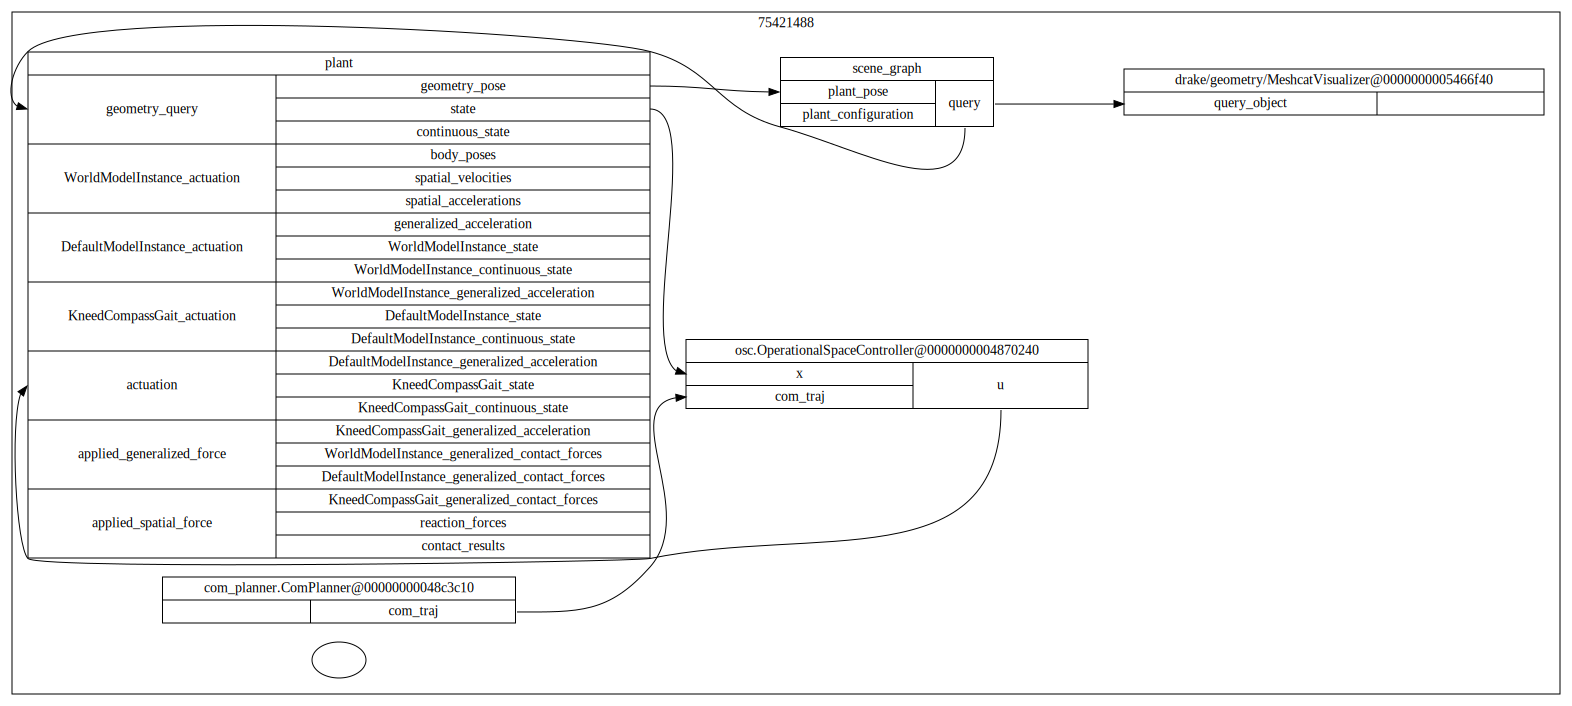

SystemExit: Failure at multibody/plant/tamsi_solver.cc:218 in SolveQuadraticForTheSmallestPositiveRoot(): condition 'Delta > 0' failed.

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [32]:
import importlib
import pydot
import numpy as np
from IPython.display import SVG, display

from pydrake.all import (
    # ConnectMeshcatVisualizer,
    JointIndex,
    Simulator,
    DiagramBuilder,
    AddMultibodyPlantSceneGraph,
    Parser,
    RigidTransform,
    MeshcatVisualizer,
    MeshcatVisualizerParams,
    ConstantVectorSource,
    ConstantValueSource,
    PiecewisePolynomial,
    AbstractValue,
    HalfSpace,
    CoulombFriction,
    StartMeshcat,
)

import osc_gains
importlib.reload(osc_gains)
from osc_gains import OscGains

import osc
importlib.reload(osc)
from osc import OperationalSpaceController

import com_planner
importlib.reload(com_planner)
from com_planner import ComPlanner

# Start meshcat simulation software
# meshcat = StartMeshcat()

# Create block diagram of system
builder = DiagramBuilder()
plant, scene_graph = AddMultibodyPlantSceneGraph(builder, 0.0005)
X_WG = HalfSpace.MakePose(
    np.array([0, 0, 1]),
    np.zeros(3),
)
plant.RegisterCollisionGeometry(
    plant.world_body(), X_WG, HalfSpace(), "collision", CoulombFriction(1.0, 1.0)
)
parser = Parser(plant)
parser.AddModelFromFile("3d_biped.urdf")
plant.Finalize()
num_positions = plant.num_positions()
num_joints = plant.num_joints()

print("floating base:")
for j in plant.GetFloatingBaseBodies():
    body = plant.get_body(j)
    start = body.floating_positions_start()
    print(body.name())

print("joints:")
# Print names of each joint
for i in range(num_joints):
    index = JointIndex(i)
    j = plant.get_joint(index)
    print(j.name())

# Print number of positions
print(f"number of positions: {num_positions}")
print(f"number of joints: {num_joints}")

# Get OSC gains
Kp = np.diag([10, 0, 10])
Kd = np.diag([10, 0, 10])
W = np.diag([1, 0, 1])

Wcom = np.eye(3)

gains = OscGains(
    Kp,
    Kd,
    Wcom,
    Kp,
    Kd,
    W,
    Kp,
    Kd,
    W,
)

planner = builder.AddSystem(ComPlanner())

# Wire OSC to plant
osc = builder.AddSystem(OperationalSpaceController(gains))
builder.Connect(osc.get_output_port(), plant.get_actuation_input_port())

# Wire planner inputs
# TODO

# Wire OSC inputs
builder.Connect(plant.get_state_output_port(), osc.get_state_input_port())

builder.Connect(
    planner.get_com_traj_output_port(), osc.get_traj_input_port("com_traj")
)

# TODO: Adjust target wlaking speed here
# walking_speed = 0.5  # walking speed in m/s

# osc = builder.AddSystem(OperationalSpaceController(gains))
# planner = builder.AddSystem(footstep_planner.LipTrajPlanner())
# speed_src = builder.AddSystem(ConstantVectorSource(np.array([walking_speed])))
# base_traj_src = builder.AddSystem(
#     ConstantValueSource(
#         AbstractValue.Make(
#             PiecewisePolynomial(
#                 np.zeros(
#                     1,
#                 )
#             )
#         )
#     )
# )

# Wire planner inputs
# builder.Connect(plant.get_state_output_port(), planner.get_state_input_port())
# builder.Connect(speed_src.get_output_port(), planner.get_walking_speed_input_port())

# Wire OSC inputs
# builder.Connect(plant.get_state_output_port(), osc.get_state_input_port())
# builder.Connect(
#     planner.get_swing_foot_traj_output_port(),
#     osc.get_traj_input_port("swing_foot_traj"),
# )
# builder.Connect(
#     planner.get_com_traj_output_port(), osc.get_traj_input_port("com_traj")
# )
# builder.Connect(
#     base_traj_src.get_output_port(), osc.get_traj_input_port("base_joint_traj")
# )

# Add the visualizer
vis_params = MeshcatVisualizerParams(publish_period=0.01)
MeshcatVisualizer.AddToBuilder(builder, scene_graph, meshcat, params=vis_params)

# Wire OSC to plant
# builder.Connect(osc.get_output_port(), plant.get_actuation_input_port())

# simulate
diagram = builder.Build()
display(
    SVG(
        pydot.graph_from_dot_data(diagram.GetGraphvizString(max_depth=2))[
            0
        ].create_svg()
    )
)

sim_time = 10.0
simulator = Simulator(diagram)
simulator.Initialize()
simulator.set_target_realtime_rate(1)

plant_context = diagram.GetMutableSubsystemContext(
    plant, simulator.get_mutable_context()
)
# print(plant_context)
q = np.zeros((num_positions,))

# quaternion
q[0] = 1
q[1] = 0
q[2] = 0
q[3] = 0

# x, y, z
q[4] = 0
q[5] = 0
q[6] = 1.15

q[8] = 0.2
q[12] = -0.2

q[10] = 0  # left knee
q[14] = 0  # right knee

plant.SetPositions(plant_context, q)

import time

time.sleep(10)

simulator.AdvanceTo(sim_time)

# Set the robot state
# plant_context = diagram.GetMutableSubsystemContext(
#     plant, simulator.get_mutable_context())
# q = np.zeros((plant.num_positions(),))
# q[1] = 0.8
# theta = -np.arccos(q[1])
# q[3] = theta
# q[4] = -2 * theta
# q[5] = theta
# q[6] = -2 * theta
# plant.SetPositions(plant_context, q)

# Simulate the robot
# simulator.AdvanceTo(sim_time)


Run/begin the simulation in meshcat

In [58]:
# NOTE - if you make changes, you should re-run the cell above this one
from pydrake.all import JointIndex

sim_time = 10.0
simulator = Simulator(diagram)
simulator.Initialize()
simulator.set_target_realtime_rate(1)

# Set the robot state
plant_context = diagram.GetMutableSubsystemContext(
    plant, simulator.get_mutable_context())
q = np.zeros((plant.num_positions(),))
print("num joints: ", plant.num_joints())
print("num positions: ", plant.num_positions())
q[1] = 0.8
theta = -np.arccos(q[1])
q[2] = theta
# q[7] = theta
# q[8] = -2 * theta 
# q[9] = theta 
# q[10] = -2 * theta


# q[1] = 0.8
# theta = -np.arccos(q[1])
# q[3] = theta
# q[4] = -2 * theta
# q[5] = theta
# q[6] = -2 * theta


for i in range(plant.num_joints()):
    index = JointIndex(i)
    joint = plant.get_joint(index)
    name = joint.name()
    print(name)


print("q: ", q)
# print(plant.get_joint(0).name)
plant.SetPositions(plant_context, q)

# Simulate the robot
simulator.AdvanceTo(sim_time)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9d30b34-d2b0-45d2-80c6-e254c58714f3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>